In [3]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [5]:
import pandas as pd


df = pd.read_csv('Titanic-Dataset.csv')

# Show basic info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("Shape of dataset:", df.shape)
df.info()

# Check missing values
df.isnull().sum()

# Describe numerical columns
df.describe()

# Unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col}:", df[col].unique())


Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarth

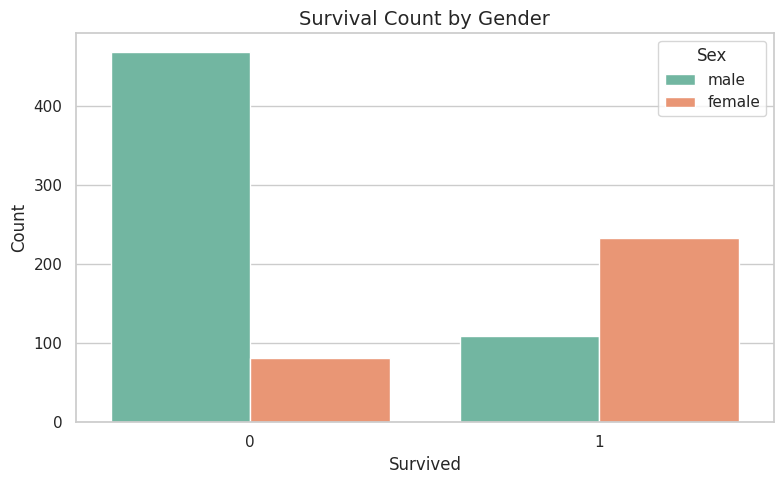

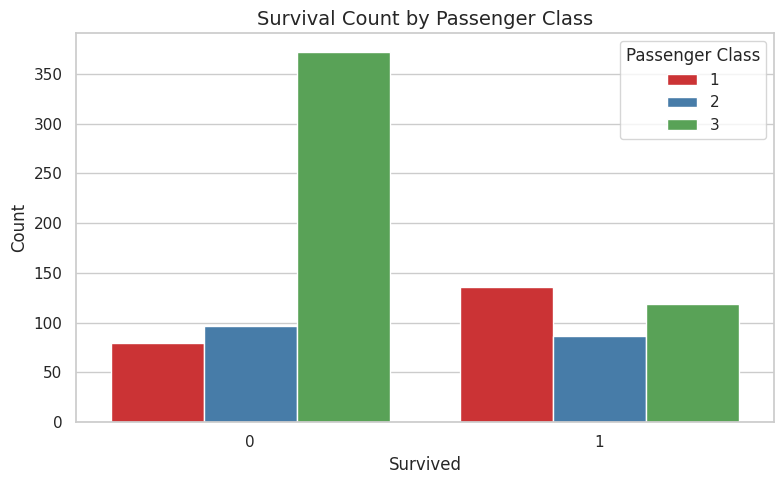

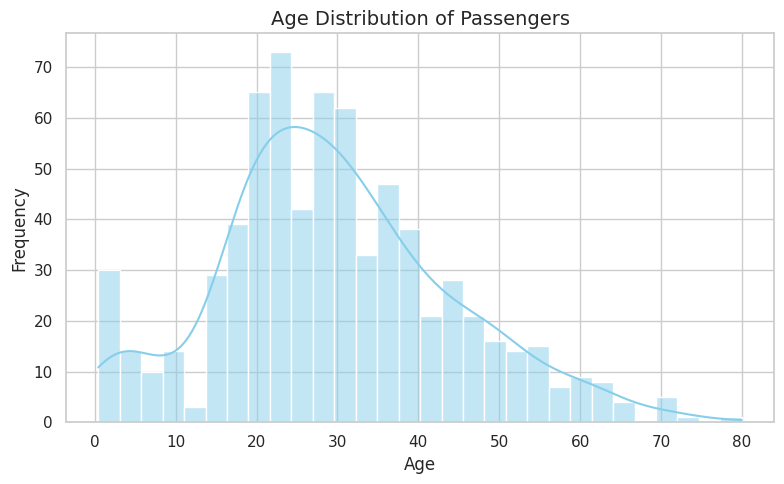

In [8]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Set figure size globally
plt.rcParams["figure.figsize"] = (8, 5)

# 1. Gender vs Survival
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set2')
plt.title("Survival Count by Gender", fontsize=14)
plt.xlabel("Survived", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

# 2. Pclass vs Survival
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Survived', hue='Pclass', palette='Set1')
plt.title("Survival Count by Passenger Class", fontsize=14)
plt.xlabel("Survived", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Passenger Class")
plt.tight_layout()
plt.show()

# 3. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()



In [9]:
# 1. Check Missing Values
print("Missing Values:")
print(df.isnull().sum())

# 2. Drop columns that are not useful
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# 3. Handle Missing Values
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4. Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Final check
print("\nFinal Dataset Overview:")
print(df.head())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Final Dataset Overview:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


/tmp/ipython-input-9-797056757.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-9-797056757.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [10]:
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔁 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.8100558659217877

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


🔁 Confusion Matrix:
 [[90 15]
 [19 55]]


In [11]:
# Cross-validation to check model robustness
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)

print("📈 Cross-Validation Scores:", cv_scores)
print("📊 Average CV Accuracy:", cv_scores.mean())


📈 Cross-Validation Scores: [0.7877095  0.78651685 0.78089888 0.76966292 0.82022472]
📊 Average CV Accuracy: 0.7890025735986442


/tmp/ipython-input-15-2850060949.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
/tmp/ipython-input-15-2850060949.py:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


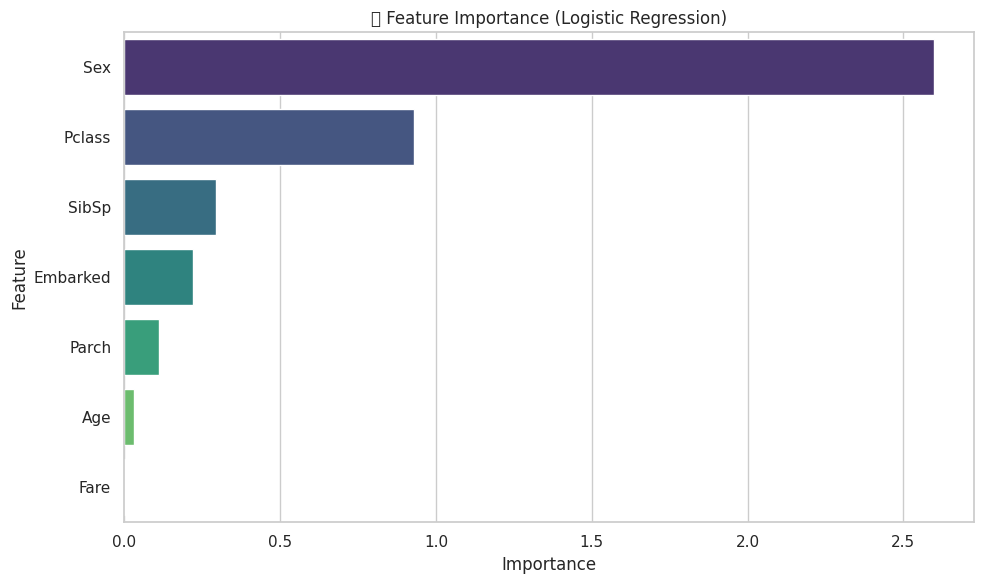

In [15]:
# Feature Importance for Logistic Regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("🔍 Feature Importance (Logistic Regression)")
plt.tight_layout()
plt.show()


In [13]:
import joblib

# Save model
joblib.dump(model, 'titanic_model.pkl')
print("✅ Model saved as 'titanic_model.pkl'")


✅ Model saved as 'titanic_model.pkl'


In [14]:
# Predict survival for a new passenger (example from test data)
sample_passenger = X_test.iloc[[0]]
predicted = model.predict(sample_passenger)

print("🚢 Prediction for Sample Passenger:", "Survived" if predicted[0] == 1 else "Did NOT Survive")


🚢 Prediction for Sample Passenger: Did NOT Survive
